In [265]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [266]:
k = 8.99*10**9 

In [267]:
# object initial locations and velocities
pos_object1 = [0,0,0]
vel_object1 = [0,0,0]
acc_object1 = [0,0,0]
charge_object1 = 1

pos_object2 = [5*10**(-6),0,0]
vel_object2 = [0,5*10**(-6),0]
acc_object2 = [0,0,0]
charge_object2 = -1

In [268]:
print(pos_object2)
print([0,5*10**(-8),0])

[4.9999999999999996e-06, 0, 0]
[0, 5e-08, 0]


In [269]:
def calc_electroF(c1,c2,pos1,pos2):
    x_dist = pos2[0] - pos1[0]
    y_dist = pos2[1] - pos1[1]
    z_dist = pos2[2] - pos1[2]
    r = math.sqrt((x_dist)**2 + (y_dist)**2 + (z_dist)**2)
    return [k * c1 * c2 / (r ** 2), r]

In [270]:
# For loop to simulate frames
simulation_length = (1/10)*10**6 # Each frame represents 1 second
information_dict = {}

der_names = ["pos","vel","acc"]
for i in range(2):
    name = "c" + str(i + 1)
    information_dict[name] = {}

    for j in range(3):
        information_dict[name][der_names[j]] = []

print(f'Days:{simulation_length/60/60/24}')

Days:1.1574074074074074


In [271]:
temp = 0
for frame in range(int(simulation_length)):

    pos_object1 = [x + y for x, y in zip(pos_object1, vel_object1)]
    pos_object2 = [x + y for x, y in zip(pos_object2, vel_object2)]

    vel_object1 = [x + y for x, y in zip(vel_object1, acc_object1)]
    vel_object2 = [x + y for x, y in zip(vel_object2, acc_object2)]

    acc_object1 = [0,0,0]
    acc_object2 = [0,0,0]

    x_dist = pos_object2[0]-pos_object1[0]
    y_dist = pos_object2[1]-pos_object1[1]
    z_dist = pos_object2[2]-pos_object1[2]

    dist = math.sqrt((x_dist)**2 + (y_dist)**2 + (z_dist)**2)
    force_mag = k*charge_object1*charge_object2/(dist**2)
    force_vector = [0,0,0]
    
    
    force_vector[0] = force_mag/dist*(x_dist)
    force_vector[1] = force_mag/dist*(y_dist)
    force_vector[2] = force_mag/dist*(z_dist)
    
    for i in range(3):
        acc_object1[i] = force_vector[i]/charge_object1
        acc_object2[i] = -force_vector[i]/charge_object2
    print(acc_object1,acc_object2)

    information_dict["c1"]["pos"].append(pos_object1)
    information_dict["c1"]["vel"].append(vel_object1)
    information_dict["c1"]["acc"].append(acc_object1)
    information_dict["c2"]["pos"].append(pos_object2)
    information_dict["c2"]["vel"].append(vel_object2)
    information_dict["c2"]["acc"].append(acc_object2)

    if frame % (simulation_length/10) == 0:
        print(f'Percent done: {temp*10}% Frame: {frame}')
        temp += 1
print(f'Percent done: 100% Frame: {simulation_length}')

[-1.2713779925734128e+20, -1.2713779925734128e+20, -0.0] [-1.2713779925734128e+20, -1.2713779925734128e+20, -0.0]
Percent done: 0% Frame: 0
[-3.216360178835698e+19, -6.432720357671396e+19, -0.0] [-3.216360178835698e+19, -6.432720357671396e+19, -0.0]


ZeroDivisionError: float division by zero

In [212]:
x1_pos = []
y1_pos = []
for i in range(int(simulation_length)):
    x1_pos.append(information_dict['c1']['pos'][i][0])
    y1_pos.append(information_dict['c1']['pos'][i][1])

x2_pos = []
y2_pos = []
for i in range(int(simulation_length)):
    x2_pos.append(information_dict['c2']['pos'][i][0])
    y2_pos.append(information_dict['c2']['pos'][i][1])

In [213]:
percent = .1
set_max = int(percent*len(x1_pos))

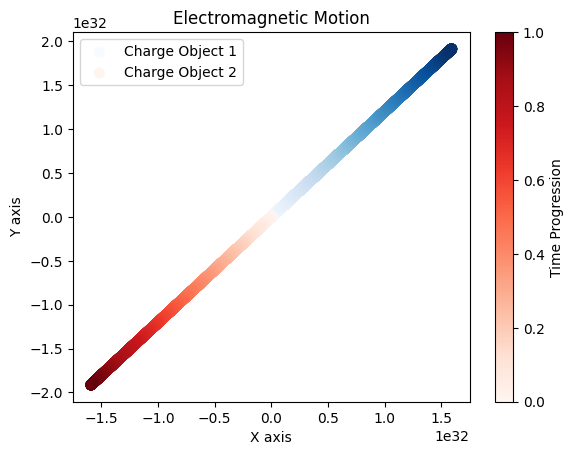

In [214]:
time1 = np.linspace(0, 1, int(percent*len(x1_pos)))
time2 = np.linspace(0, 1, int(percent*len(x2_pos)))

plt.scatter(x1_pos[0:set_max], y1_pos[0:set_max], c=time1, cmap='Blues', label='Charge Object 1', s=50)
plt.scatter(x2_pos[0:set_max], y2_pos[0:set_max], c=time2, cmap='Reds', label='Charge Object 2', s=50)

plt.colorbar(label='Time Progression')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Electromagnetic Motion')
plt.legend()
plt.show()

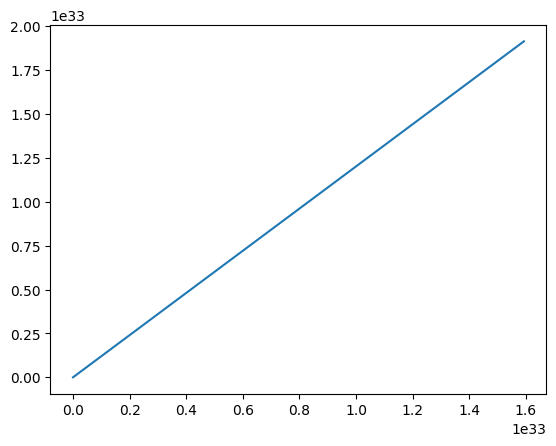

In [215]:
plt.plot(x1_pos, y1_pos)

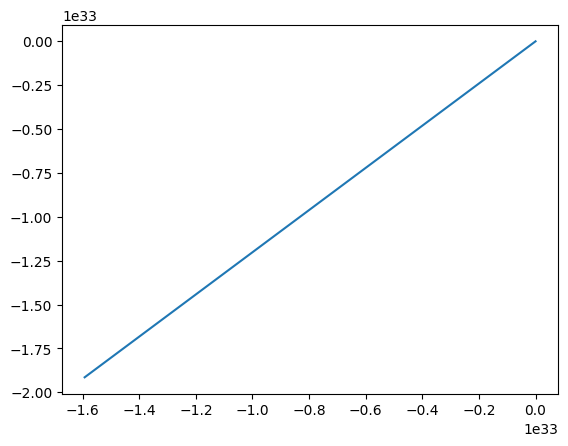

In [216]:
plt.plot(x2_pos, y2_pos)